# La finalidad es poder encontrar la mayor relación entre las caracteristicas que nos suministra el cliente, para poder modelar un algoritmo de predicción del precio de la poliza de seguro.

    1. Lectura y limpieza de datos.
    2. Explorar las caracteristicas.
    2. Análisis de las variables.
    4. Identificar relación entre variables.
    5. División de datos.
    6. Construcción del Modelo.
    7. Evaluación del modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import scipy.stats as stats


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [6]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.56
581,19,male,30.59,0,no,northwest,1639.56


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### En esta etapa pudimos verificar:
    * Cantidad de columnas y filas.
    * Existencia de duplicados y eliminar el mismo.
    * No existen valores faltantes.
    * Tipo de columnas.

## Grafica de variables, visualizar distribución de las variables.

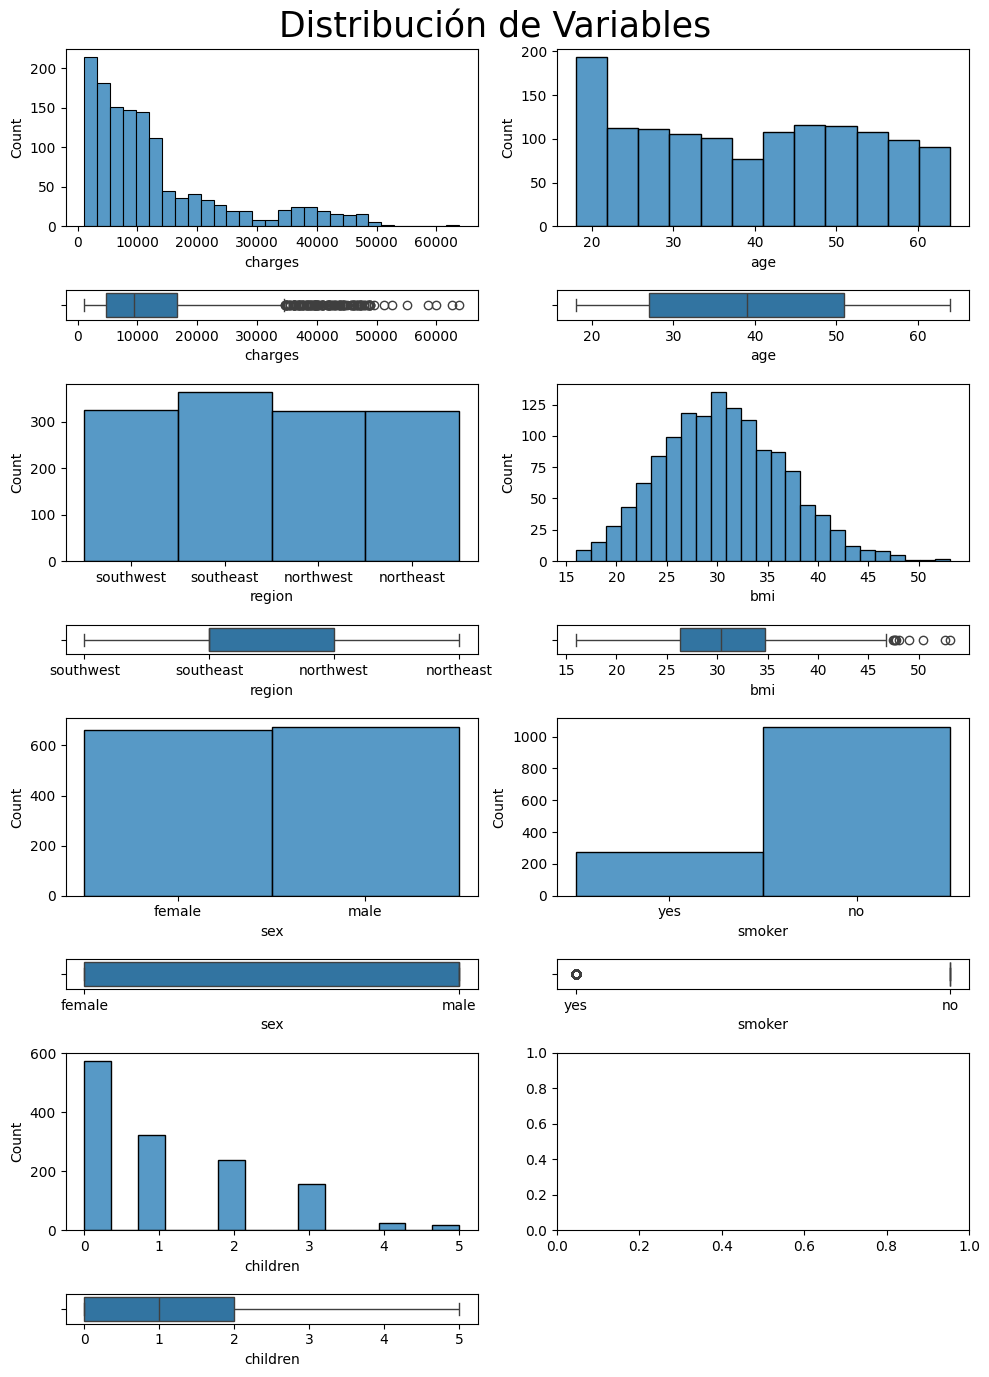

In [9]:
fig, axis = plt.subplots(8,2, figsize= (10,14), gridspec_kw={"height_ratios": [6, 1, 6, 1, 6, 1, 6, 1]})

sns.histplot(ax= axis[0,0], data = df, x = "charges" )
sns.boxplot( ax = axis[1,0], data = df, x= "charges")

sns.histplot(ax= axis[0,1], data = df, x = "age" )
sns.boxplot( ax = axis[1,1], data = df, x= "age")

sns.histplot(ax= axis[2,0], data = df, x = "region" )
sns.boxplot( ax = axis[3,0], data = df, x= "region")

sns.histplot(ax= axis[2,1], data = df, x = "bmi" )
sns.boxplot( ax = axis[3,1], data = df, x= "bmi")

sns.histplot(ax= axis[4,0], data = df, x = "sex" )
sns.boxplot( ax = axis[5,0], data = df, x= "sex")

sns.histplot(ax= axis[4,1], data = df, x = "smoker" )
sns.boxplot( ax = axis[5,1], data = df, x= "smoker")

sns.histplot(ax= axis[6,0], data = df, x = "children" )
sns.boxplot( ax = axis[7,0], data = df, x= "children")

fig.delaxes(axis[7, 1])


plt.suptitle("Distribución de Variables", size=25)

plt.tight_layout()
plt.show()

### verificando las variables por separado, podemos observar :

    1- La mayoria de polizas son inferiores al valor de 20.000$.
    2- El rango de edades tiene mayor incidencia de 20 - 30 años.
    3- La región tiene una diferencia muy pequeña, siendo el sureste quien tiene mas precencia.
    4- el BMI tiene la mayor presencia entre 25-35, esto indica que la mayoria de los asegurados, tiene sobrepeso, debido a que un nivel normal es hasta 18.5

### Procedemos convertir las variables categoricas en variables indicadoras, para concatenarlas con un la data que solo es numerica, de esa manera podemos trabajar con el conjunto de datos de manera mas comoda.

In [10]:
df_nm = pd.get_dummies(df[["sex", "smoker", "region"]])
df_ap = df.select_dtypes(exclude=('object'))
carga = [df_ap,df_nm]
data = pd.concat(carga, axis=1)

## Validamos los valores anomalos

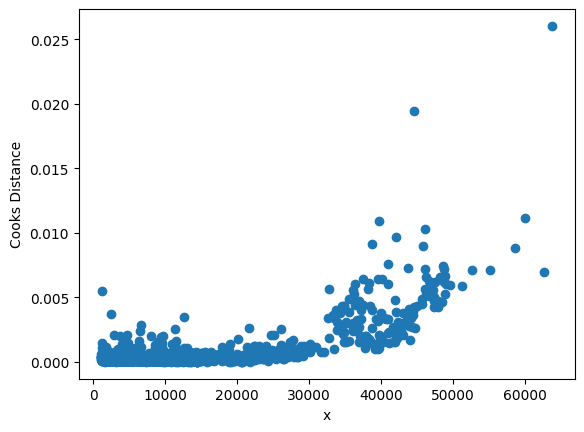

In [11]:
import statsmodels.api as sm
import pandas as pd


X = df_ap.drop('charges', axis=1)
y = df_ap['charges']

X = sm.add_constant(X)


modelo = sm.OLS(y, X).fit()

influencia = modelo.get_influence()
distancia_cook = influencia.cooks_distance

plt.scatter(df_ap.charges, distancia_cook[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [12]:
np.where(distancia_cook[0]>0.005)

(array([  14,   34,   39,  109,  128,  161,  175,  185,  263,  265,  281,
         292,  377,  420,  421,  488,  530,  543,  549,  577,  620,  673,
         676,  724,  758,  802,  818,  859,  882,  900,  950, 1046, 1061,
        1121, 1123, 1145, 1155, 1185, 1229, 1239, 1240, 1287, 1299, 1300,
        1316]),)

In [13]:
indices = [14, 34, 39, 109, 128, 161, 175, 185, 263, 265, 281, 292, 377, 420, 421, 488, 530, 543, 549, 577, 620, 673, 676, 724, 758, 802, 818, 859, 882, 900, 950, 1046, 1061, 1121, 1123, 1145, 1155, 1185, 1229, 1239, 1240, 1287, 1299, 1300, 1316]

df.iloc[indices].head()


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.76
34,28,male,36.40,1,yes,southwest,51194.56
39,60,male,39.90,0,yes,southwest,48173.36
109,63,male,35.09,0,yes,southeast,47055.53
128,32,female,17.77,2,yes,northwest,32734.19


### Todos los casos anomalos, podemos observar que tienen algo en comun. 

        * Son personas fumadoras casi en su totalidad.
        * Tienen problema de sobrepeso.
        
Consideramos que son datos que se deben quedar, porque aportaran informacion importante al modelo.
        

### Correlación entre las variables.

In [14]:
df_corr = data.corr()
df_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.00,0.11,0.04,0.30,0.02,-0.02,0.03,-0.03,0.00,0.00,-0.01,0.01
bmi,0.11,1.00,0.01,0.20,-0.05,0.05,-0.00,0.00,-0.14,-0.14,0.27,-0.01
children,0.04,0.01,1.00,0.07,-0.02,0.02,-0.01,0.01,-0.02,0.03,-0.02,0.02
charges,0.30,0.20,0.07,1.00,-0.06,0.06,-0.79,0.79,0.01,-0.04,0.07,-0.04
sex_female,0.02,-0.05,-0.02,-0.06,1.00,-1.00,0.08,-0.08,0.00,0.01,-0.02,0.00
sex_male,-0.02,0.05,0.02,0.06,-1.00,1.00,-0.08,0.08,-0.00,-0.01,0.02,-0.00
smoker_no,0.03,-0.00,-0.01,-0.79,0.08,-0.08,1.00,-1.00,-0.00,0.04,-0.07,0.04
smoker_yes,-0.03,0.00,0.01,0.79,-0.08,0.08,-1.00,1.00,0.00,-0.04,0.07,-0.04
region_northeast,0.00,-0.14,-0.02,0.01,0.00,-0.00,-0.00,0.00,1.00,-0.32,-0.35,-0.32
region_northwest,0.00,-0.14,0.03,-0.04,0.01,-0.01,0.04,-0.04,-0.32,1.00,-0.35,-0.32


## Es notorio que el valor de la prima es influenciado por 3 caracteristicas principalmente.
    1- Fumador.
    2- Edad.
    3- Indice de masa muscular.

        Las otras variables muestran una relación baja o casi nula.

In [15]:
dt_pro = data.drop(['children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)
dt_pro.head(5)

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.90,16884.92,True,False,False,True
1,18,33.77,1725.55,False,True,True,False
2,28,33.00,4449.46,False,True,True,False
3,33,22.70,21984.47,False,True,True,False
4,32,28.88,3866.86,False,True,True,False


In [16]:
X = dt_pro.drop(['charges'], axis= 1)
y = dt_pro['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
escalador = MinMaxScaler()

X_train_escalado = escalador.fit_transform(X_train)
X_test_escalado = escalador.transform(X_test)

In [17]:
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train_escalado, X_test_escalado, y_train, y_test)

 21%|██▏       | 9/42 [00:00<00:02, 16.29it/s]

100%|██████████| 42/42 [00:02<00:00, 16.41it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score 13030.203373


In [18]:
print(models)

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.90       0.90   4256.63   
LGBMRegressor                                0.89       0.89   4508.61   
HistGradientBoostingRegressor                0.89       0.89   4513.02   
RandomForestRegressor                        0.88       0.88   4673.71   
KNeighborsRegressor                          0.88       0.88   4727.58   
BaggingRegressor                             0.87       0.87   4873.60   
AdaBoostRegressor                            0.86       0.86   4990.12   
XGBRegressor                                 0.85       0.86   5115.78   
ExtraTreesRegressor                          0.85       0.85   5203.46   
PoissonRegressor                             0.82       0.83   5665.18   
SGDRegressor                                 0.80       0.81   5981.09   
TransformedTargetRegressor            

In [19]:
model = LGBMRegressor(n_estimators=100, learning_rate=0.1)

In [20]:
model.fit(X_train_escalado, y_train)
y_pred = model.predict(X_test_escalado)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score 13030.203373


In [21]:
puntuaciones = cross_val_score(model, X_train_escalado, y_train, cv=10)
print("Puntuaciones de validación cruzada: {}".format(puntuaciones))
print("Puntuación media de validación cruzada: {:.2f}".format(puntuaciones.mean()))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 962, number of used features: 6
[LightGBM] [Info] Start training from score 13011.457168
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 962, number of used features: 6
[LightGBM] [Info] Start training from score 13022.466813
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug